In [18]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import * 
from data_processing import *
from hyperparams import *
from classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# loading train data 
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0



In [3]:
idx_incomplete_points = np.nonzero(input_data[:,4]==-999)
tx_new= np.delete(input_data,idx_incomplete_points,0)
y_new = np.delete(yb,idx_incomplete_points)
idx_incomplete_points = np.nonzero(tx_new[:,0]==-999)
tx_rem = np.delete(tx_new,idx_incomplete_points,0)
y_new = np.delete(y_new,idx_incomplete_points)
y_new = np.reshape(y_new,[len(y_new),1])


In [4]:
#Normalization of feature with log normaly distributed

indices_gaussian_log = [2,3,5,7,9,10,19,23]

for x in indices_gaussian_log:
     c = tx_rem[:,x]
     c = np.log(tx_rem[:,x])
     mean = np.mean(c, axis=0)
     std_dev = np.std(c, axis=0)
     tx_rem[:,x] = (c -mean*np.ones(np.shape(c))) / std_dev
    



In [5]:
#standardisation normale pour les quelques colonnes qui semblent gaussiennes

indices_gaussian =[0,1,4,6,8,11,12,13,14,15,16,17,18,20,24,25,26,27,28]
for x in indices_gaussian :
     c = tx_rem[:,x]
     mean = np.mean(c, axis=0)
     std_dev = np.std(c, axis=0)
     tx_rem[:,x] = (c -mean*np.ones(np.shape(c))) / std_dev
     
tx_rem = np.delete(tx_rem,29,1)
tx_rem = np.delete(tx_rem,21,1)


print(tx_rem.shape)  

(68114, 28)


In [16]:
tx_rem = add_w0(tx_rem,tx_rem.shape[0])   
tx_reduced = (tx_rem[range(10000),:])  
y_reduced = (y_new[range(10000)])

ratio = 0.8
y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)


A) Gradient Descent (MSE)

In [17]:
initial_w = np.zeros([x_tr.shape[1],1])   
max_iters = 100
gamma = 0.1
w_optA, lossA = mean_squared_error_gd(y_tr, x_tr, initial_w, max_iters, gamma)
print(lossA)
print(w_optA.shape)

0.09277007594712681
(30, 1)


B) Syochastic Gradient Descent (MSE)

In [8]:
gamma = 0.1
max_iters = 100
w_optB, lossB = mean_squared_error_sgd(y_tr, x_tr, initial_w, max_iters, gamma)
print(lossB)
print(w_optB.shape)

8501183384.594785
(29, 1)


C) Least Squares

In [9]:
w_optC, lossC = least_squares(y_tr, x_tr)
print(lossC)
print(w_optC.shape)

0.09067340059202848
(29, 1)


D) Ridge Regression

In [10]:
best_lambda, best_rmse = cross_validation_demo_ridge_reg(y_tr, x_tr, 7, 4, initial_w, np.logspace(-4, 0, 50), 3, gamma, max_iters)
w_optD, lossD = ridge_regression(y_tr,x_tr,best_lambda)
print(lossD)
print(w_optD.shape)

0.0906747756456785
(29, 1)


E) Logistic Regression

In [11]:
initial_w = np.zeros([x_tr.shape[1],1])   
max_iters = 100
gamma = 0.4
w_optE, lossE = logistic_regression(y_tr, x_tr, initial_w, max_iters, gamma)

Good and bad guesses: 1442  558
How well our model can classify binary outcomes: 
Accuracy: 0.721
Precision: 0.780
Recall: 0.743
AUC: 0.802


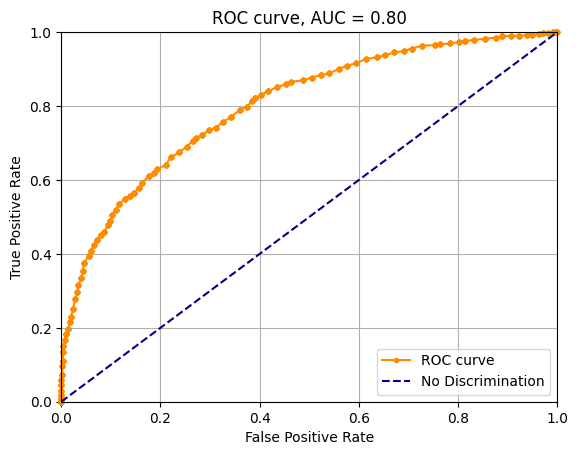

In [12]:
scoreE = sigmoid(x_te@w_optE)
y_resultE = sigmoid(x_te@w_optE)
y_resultE[y_resultE>0.5] = 1
y_resultE[y_resultE<0.5] = 0

accuracyG, precision, recall, auc = get_accuracy(y_resultE, y_te, scoreE)


F) Reg-Logistic Regression

For polynomial expansion up to degree 3, the choice of lambda which leads to the best test rmse is 0.00021 with a test rmse of 0.528
0.5403309518658809
(29, 1)


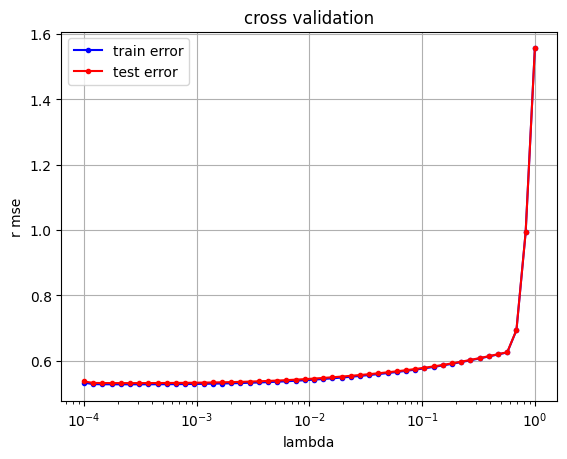

In [13]:
initial_w = np.ones([x_tr.shape[1],1])
max_iters = 50
gamma = 0.7
best_lambda, best_rmse = cross_validation_demo(y_tr, x_tr, 7, 4, initial_w, np.logspace(-4, 0, 50), 3, gamma, max_iters)
w_optF,lossF = reg_logistic_regression(y_tr, x_tr, best_lambda, initial_w, max_iters, gamma)
print(lossF)
print(w_optF.shape)

G) K-nearest_neighbors

Good and bad guesses: 1217  783
How well our model can classify binary outcomes: 
Accuracy: 0.609
Precision: 0.707
Recall: 0.702
AUC: 0.648


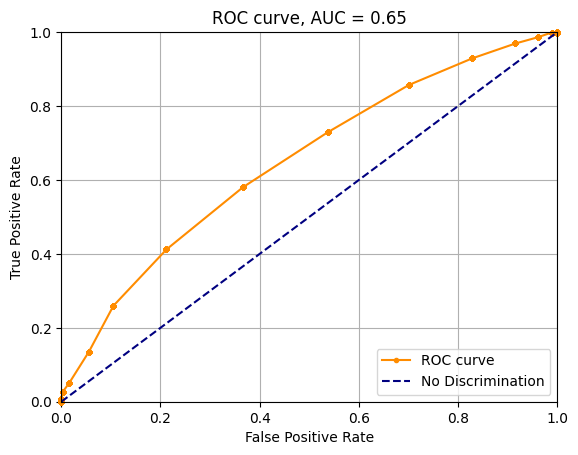

In [14]:
K = 20
y_resultKNN = np.zeros((y_te.shape[0],1))
scoresKNN = np.zeros((y_te.shape[0]))
for i in range (y_te.shape[0]):
    Kneighbors, Kindexes = get_Kneighbors(x_tr, K, x_te[i,:])
    scoreKNN, new_prediction = get_Kprediction(Kindexes, K, y_tr) 
    scoresKNN[i] = scoreKNN
    y_resultKNN[i] = new_prediction
    
accuracyG, precision, recall, auc = get_accuracy(y_resultKNN, y_te, scoresKNN)

Loop of accuracies

In [19]:
from boxplotloop import *

M = 3
accuracyA = np.zeros((M,1))
accuracyB = np.zeros((M,1))
accuracyC = np.zeros((M,1))
accuracyD = np.zeros((M,1))
accuracyE = np.zeros((M,1))
accuracyF = np.zeros((M,1))
accuracyG = np.zeros((M,1)) #K-nearest neighbors takes too much time
for i in range(M):
    print(i)
    accuracyA[i], accuracyB[i], accuracyC[i], accuracyD[i], accuracyE[i], accuracyF[i] = Mloop(tx_rem, y_new)


0


KeyboardInterrupt: 

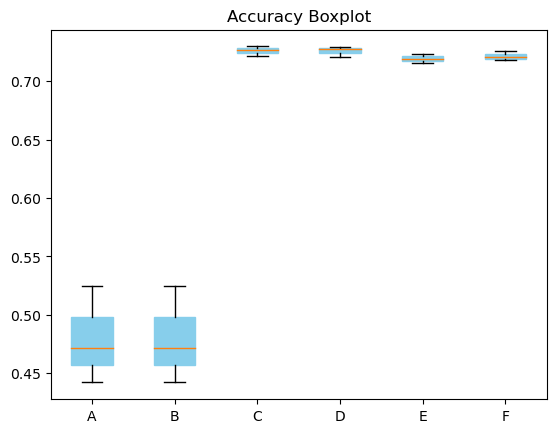

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracies = np.concatenate((accuracyA, accuracyB, accuracyC, accuracyD, accuracyE,accuracyF), axis=1)

fig = plt.figure(1)
bp = plt.boxplot(accuracies, vert=True, patch_artist = True)
for patch in bp['boxes']:
  patch.set_color('skyblue')
plt.gca().xaxis.set_ticklabels(['A', 'B', 'C','D','E','F'])
plt.title('Accuracy Boxplot')
plt.show()
plt.savefig('Boxplot functions')